# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Shalsabilla Amanda Putri
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Dari kota mana pelanggan paling banyak berbelanja?
- Kategori apa yang paling laris dalam penjualan?

## Import Semua Packages/Library yang Digunakan

In [10]:
#memanggil semua library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [97]:


# Membaca setiap dataset ke dalam DataFrame
customers_dataset_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/E-Commerce Public Dataset/customers_dataset.csv")
geolocation_dataset_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/E-Commerce Public Dataset/geolocation_dataset.csv")
order_items_dataset_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/E-Commerce Public Dataset/order_items_dataset.csv")
order_payments_dataset_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/E-Commerce Public Dataset/order_payments_dataset.csv")
#order_reviews_dataset_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/E-Commerce Public Dataset/order_reviews_dataset.csv")
orders_dataset_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/E-Commerce Public Dataset/orders_dataset.csv")
#product_category_dataset_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/E-Commerce Public Dataset/product_category_name_translation.csv")
products_dataset_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/E-Commerce Public Dataset/products_dataset.csv")
#sellers_dataset_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/E-Commerce Public Dataset/sellers_dataset.csv")




**Insight:**
- berhasil mengupload data-data csv

## Assessing data

**Memeriksa tipe data** dan **mengidentifikasi apakah ada missing value** pada setiap kolom

In [12]:
# Memeriksa tipe data dari setiap dataset
print("\n** Customers Dataset:")
customers_dataset_df.info()

print("\n** Geolocation Dataset:")
geolocation_dataset_df.info()

print("\n** Order Items Dataset:")
order_items_dataset_df.info()

print("\n** Orders Dataset:")
orders_dataset_df.info()


print("\n** Products Dataset:")
products_dataset_df.info()



** Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

** Geolocation Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3  

**Memeriksa duplikasi data** dan **menampilkan ringkasan statistik**

In [13]:
# memeriksa duplikasi & menampilkan ringkasan statistik dengan menggunakan fungsi
def check_duplicates_and_statistics(df, name):
    print(f"\n ***Dataset***: {name}")
    # Cek jumlah duplikasi
    duplicates = df.duplicated().sum()
    print(f"*Jumlah duplikasi*: {duplicates}")

    # Tampilkan ringkasan statistik hanya untuk kolom numerik
    print("\n **Ringkasan Statistik**:")
    print(df.describe())

# Cek untuk setiap dataset
check_duplicates_and_statistics(customers_dataset_df, "Customers Dataset")
check_duplicates_and_statistics(geolocation_dataset_df, "Geolocation Dataset")
check_duplicates_and_statistics(order_items_dataset_df, "Order Items Dataset")
check_duplicates_and_statistics(orders_dataset_df, "Orders Dataset")
check_duplicates_and_statistics(products_dataset_df, "Products Dataset")


 ***Dataset***: Customers Dataset
*Jumlah duplikasi*: 0

 **Ringkasan Statistik**:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

 ***Dataset***: Geolocation Dataset
*Jumlah duplikasi*: 261831

 **Ringkasan Statistik**:
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01   

Insight :
- **MISSING VALUE** pada

1. **orders_dataset** yaitu pada kolom **order_approved_at** (99281) , **order_delivered_carrier_data** (97658), dan **order_delivered_customer_date** (96476)
2. products_dataset yaitu pada kolom **product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_lenght_cm, product_height_cm, dan product_width_cm.**


- **KESALAHAN TIPEDATA** dari beberapa kolom pada dataset yaitu


1. **orders_dataset** pada kolom **order_purchase_timestamp, order_approved_at, **
 **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date** HARUSNYA bukan OBJECT tapi DATETIME


- **DUPLIKASI DATA** pada **geolocation_dataset** sebanyak **261831**

## Data Cleaning

**MENGHILANGKAN DUPLIKASI DATA**

In [14]:
#menghilangkan duplicate data menggunakan method drop_duplicates() pada geolocation_dataset
geolocation_dataset_df.drop_duplicates(inplace=True)

In [15]:
#memeriksa kembali apakah ada duplikasi data pada geolocation_dataset
print("Jumlah duplikasi setelah menggunakan method drop_duplicates: ",geolocation_dataset_df.duplicated().sum())

Jumlah duplikasi setelah menggunakan method drop_duplicates:  0


MENGATASI MISSING VALUE pada orders_dataset

In [16]:
#mengidentifikasi kembali missing value
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [17]:
#menangani missing value pada orders_dataset
orders_dataset_df[orders_dataset_df['order_approved_at'].isna()]
orders_dataset_df[orders_dataset_df['order_delivered_carrier_date'].isna()]
orders_dataset_df[orders_dataset_df['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [18]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
orders_dataset_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [19]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
orders_dataset_df.order_delivered_carrier_date.value_counts()

,count
order_delivered_carrier_date,
2018-05-09 15:48:00,47
2018-05-10 18:29:00,32
2018-05-07 12:31:00,21
2018-05-02 15:15:00,16
2018-07-24 16:07:00,16
...,...
2018-01-03 17:37:21,1
2017-10-27 20:07:58,1
2017-11-21 18:57:37,1


In [20]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
orders_dataset_df.order_delivered_customer_date.value_counts()

,count
order_delivered_customer_date,
2018-05-08 23:38:46,3
2016-10-27 17:32:07,3
2018-02-14 21:09:19,3
2017-06-19 18:47:51,3
2018-05-08 19:36:48,3
...,...
2018-07-12 17:48:45,1
2018-05-18 18:24:36,1
2018-01-17 13:29:13,1


In [21]:
#penggantian value menggunakan method fillna()
orders_dataset_df['order_approved_at'].fillna('No Message', inplace=True)

<ipython-input-21-d6d64ffee27b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_dataset_df['order_approved_at'].fillna('No Message', inplace=True)


In [22]:
#penggantian value menggunakan method fillna()
orders_dataset_df['order_delivered_carrier_date'].fillna('No Message', inplace=True)

<ipython-input-22-fb899e88557e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_dataset_df['order_delivered_carrier_date'].fillna('No Message', inplace=True)


In [23]:
#penggantian value menggunakan method fillna()
orders_dataset_df['order_delivered_customer_date'].fillna('No Message', inplace=True)

<ipython-input-23-cf8862e94755>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_dataset_df['order_delivered_customer_date'].fillna('No Message', inplace=True)


In [24]:
#mengidentifikasi kembali missing value
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**MISSING VALUE** PADA **orders_dataset sudah berhasil ditangani**, selanjutnya menangani missing value pada products_dataset

MENANGANI MISSING VALUE pada products_dataset

In [25]:
#menangani missing value pada products_df
products_dataset_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [26]:
#menangani missing value pada produscts_dataset
products_dataset_df[products_dataset_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [27]:
#menangani missing value pada produscts_dataset
products_dataset_df[products_dataset_df['product_name_lenght'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [28]:
#menangani missing value pada produscts_dataset
products_dataset_df[products_dataset_df['product_description_lenght'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [29]:
#menangani missing value pada produscts_dataset
products_dataset_df[products_dataset_df['product_photos_qty'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [30]:
#menangani missing value pada produscts_dataset
products_dataset_df[products_dataset_df['product_weight_g'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#menangani missing value pada produscts_dataset
products_dataset_df[products_dataset_df['product_length_cm'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#menangani missing value pada products_dataset
products_dataset_df[products_dataset_df['product_height_cm'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#menangani missing value pada produscts_dataset
products_dataset_df[products_dataset_df['product_width_cm'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
products_dataset_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [35]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
products_dataset_df.product_name_lenght.value_counts()

,count
product_name_lenght,
60.0,2182
59.0,2025
58.0,1887
57.0,1719
55.0,1683
...,...
66.0,1
72.0,1
67.0,1


In [36]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
products_dataset_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,94
729.0,86
651.0,66
703.0,66
236.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [37]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
products_dataset_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,16489
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [38]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
products_dataset_df.product_weight_g.value_counts()

,count
product_weight_g,
200.0,2084
300.0,1561
150.0,1259
400.0,1206
100.0,1188
...,...
6075.0,1
822.0,1
631.0,1


In [39]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
products_dataset_df.product_length_cm.value_counts()

,count
product_length_cm,
16.0,5520
20.0,2816
30.0,2029
18.0,1502
25.0,1387
...,...
96.0,4
10.0,3
8.0,2


In [40]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
products_dataset_df.product_height_cm.value_counts()

,count
product_height_cm,
10.0,2548
15.0,2022
20.0,1991
16.0,1595
11.0,1551
...,...
98.0,2
97.0,2
99.0,1


In [41]:
#menggunakan method value_counts() untuk mengidentifikasi nilai yang dominan
products_dataset_df.product_width_cm.value_counts()

,count
product_width_cm,
11.0,3718
20.0,3053
16.0,2808
15.0,2393
30.0,1786
...,...
103.0,1
86.0,1
98.0,1


In [42]:
#penggantian value menggunakan method fillna()
products_dataset_df['product_category_name'].fillna('No Category', inplace=True)

<ipython-input-42-329c29da3d09>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df['product_category_name'].fillna('No Category', inplace=True)


In [43]:
#penggantian value menggunakan method fillna()
products_dataset_df['product_name_lenght'].fillna('No Category', inplace=True)

<ipython-input-43-364001a4b061>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df['product_name_lenght'].fillna('No Category', inplace=True)
<ipython-input-43-364001a4b061>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_dataset_df['product_name_lenght'].fillna('No Category', inplace=True)


In [44]:
#penggantian value menggunakan method fillna()
products_dataset_df['product_description_lenght'].fillna('No Category', inplace=True)

<ipython-input-44-2c6012d6ed24>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df['product_description_lenght'].fillna('No Category', inplace=True)
<ipython-input-44-2c6012d6ed24>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_dataset_df['product_description_lenght'].fillna('No Category', inplace=True)


In [45]:
#penggantian value menggunakan method fillna()
products_dataset_df['product_photos_qty'].fillna('No Category', inplace=True)

<ipython-input-45-7ec1a53ceab6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df['product_photos_qty'].fillna('No Category', inplace=True)
<ipython-input-45-7ec1a53ceab6>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_dataset_df['product_photos_qty'].fillna('No Category', inplace=True)


In [46]:
#penggantian value menggunakan method fillna()
products_dataset_df['product_weight_g'].fillna('No Category', inplace=True)

<ipython-input-46-00ab439d05b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df['product_weight_g'].fillna('No Category', inplace=True)
<ipython-input-46-00ab439d05b0>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_dataset_df['product_weight_g'].fillna('No Category', inplace=True)


In [47]:
#penggantian value menggunakan method fillna()
products_dataset_df['product_length_cm'].fillna('No Category', inplace=True)

<ipython-input-47-2b62cd87a3a7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df['product_length_cm'].fillna('No Category', inplace=True)
<ipython-input-47-2b62cd87a3a7>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_dataset_df['product_length_cm'].fillna('No Category', inplace=True)


In [48]:
#penggantian value menggunakan method fillna()
products_dataset_df['product_height_cm'].fillna('No Category', inplace=True)

<ipython-input-48-0de9b1852243>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df['product_height_cm'].fillna('No Category', inplace=True)
<ipython-input-48-0de9b1852243>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_dataset_df['product_height_cm'].fillna('No Category', inplace=True)


In [49]:
#penggantian value menggunakan method fillna()
products_dataset_df['product_width_cm'].fillna('No Category', inplace=True)

<ipython-input-49-f74b146e96dd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df['product_width_cm'].fillna('No Category', inplace=True)
<ipython-input-49-f74b146e96dd>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_dataset_df['product_width_cm'].fillna('No Category', inplace=True)


In [50]:
#mengidentifikasi kembali missing value
products_dataset_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**MISSING VALUE PADA products_dataset sudah berhasil ditangani**, selanjutnya menangani tipe data yang salah pada order_reviews_dataset dan orders_dataset

MENGGANTI TIPEDATA PADA orders_dataset

In [51]:
#mengganti tipe data menggunakan  function to_datetime() yang disediakan oleh library pandas.
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column], errors='coerce')

In [52]:
#cross check
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**TIPE DATA yang TIDAK SESUAI sudah diganti**

**Insight:**
- dapat menangani missing value dari beberapa data
- dapat mengatasi data duplikat
- dapat mengganti tipedata yang tidak sesuai

## Exploratory Data Analysis (EDA)

## Explore ...

Eksplorasi data customers_dataset

In [53]:
#melihat rangkuman parameter statistik customers_dataset menggunakan method describe()
customers_dataset_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


memperoleh informasi bahwa ada **99.441 pelanggan** yang bersifat unique yang berasal dari **27 negara**

pelanggan tersebut tersebar dalam **4.119 kota** dengan **top city yaitu San Paulo** (SP) yang memiliki **41.746** pelanggan

selain itu dapat diperoleh informasi jika **segmentasi pelanggan cukup beragam** dan mencakup berbagai daerah dengan mayoritas pelanggan berasal dari San Paulo karena **kode pos pelanggan** memiliki **rata-rata 35.137** dengan **standar deviasi 29.797** yang menunjukkan bahwa pelanggan berasal dari berbagai wilayah dengan distribusi kode pos yang cukup luas.

In [54]:
#melihat demografi pelanggan berdasarkan customer_state menggunakan method groupby() lalu diikuti dengan method agg()
customers_dataset_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",     #jumlah pelanggan
    "customer_zip_code_prefix": ["min", "max", "mean", "std"] #statistik kode pos
})

customer_id customer_zip_code_prefix                       \
                   nunique                      min    max          mean   
customer_state                                                             
AC                      81                    69900  69980  69914.604938   
AL                     413                    57010  57975  57215.881356   
AM                     148                    69005  69800  69078.445946   
AP                      68                    68900  68997  68910.044118   
BA                    3380                    40010  48990  44102.125444   
CE                    1336                    60010  63960  61619.897455   
DF                    2140                    70040  73402  71665.655607   
ES                    2033                    29010  29985  29297.302017   
GO                    2020                    72800  76730  74992.567822   
MA                     747                    65010  65980  65336.518072   
MG                   11635                    30110  39995  35211.344736   
MS                     715                    79002  79995  79341.079720   
MT                     907                    78005  78890  78388.158765   
PA                     975                    66010  68820  67332.297436   
PB                     536                    58010  58995  58273.382463   
PE                    1652                    50010  56980  53675.421308   
PI                     495                    64000  64980  64244.957576   
PR                    5045                    80010  87990  84251.639049   
RJ                   12852                    20010  28999  23964.840803   
RN                     485                    59010  59995  59288.002062   
RO                     253                    76801  76997  76876.928854   
RR                      46                    69301  69380  69309.434783   
RS                    5466                    90010  99990  94748.404683   
SC                    3637                    88010  89998  88818.525158   
SE                     350                    49000  49995  49193.474286   
SP                   41746                     1003  19970   9250.356513   
TO                     280                    77001  77995  77426.560714   

                             
                        std  
customer_state               
AC                16.271662  
AL               264.487732  
AM               128.339859  
AP                16.388414  
BA              2742.967242  
CE              1235.201961  
DF               832.569925  
ES               279.183272  
GO               949.102285  
MA               323.616678  
MG              3022.661599  
MS               323.057722  
MT               278.717203  
PA              1074.676325  
PB               282.645125  
PE              2092.216949  
PI               295.125260  
PR              2323.187401  
RJ              2611.576123  
RN               268.854737  
RO                65.791057  
RR                11.750465  
RS              2845.300370  
SC               611.807756  
SE               254.080573  
SP              4987.349720  
TO               329.742894

In [55]:
#sebaran jumlah pelanggan berdasarkan kota (city) menggunakan method groupby() dan sort_values() secara descending
customers_dataset_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [56]:
#melihat persebaran jumlah pelanggan berdasarkan negara bagian(city) menggunakan method groupby() dan sort_values() secara descending
customers_dataset_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [57]:
#melihat rangkuman parameter statistik geolocation_dataset menggunakan method describe()
geolocation_dataset_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


Berdasarkan data **geolocation_dataset**, diperoleh informasi bahwa terdapat **738.332 entri data lokasi yang tersebar di 8.011 kota dan 27 negara.**

Mayoritas lokasi pelanggan berada di kota **São Paulo (SP)** dengan jumlah 79.927 entri, menjadikannya kota dengan **frekuensi tertinggi** dalam dataset ini. Selain itu, negara bagian dengan jumlah entri terbanyak adalah SP (São Paulo) dengan 285.976 data lokasi.

Distribusi kode pos pelanggan memiliki rata-rata 38.316 dengan standar deviasi 30.632, menunjukkan bahwa data lokasi mencakup berbagai wilayah dengan sebaran kode pos yang cukup luas. Kode pos terendah tercatat 1.001, sedangkan yang tertinggi mencapai 99.990, mencerminkan cakupan geografis yang luas dalam dataset ini.

In [58]:
#memeriksa jumlah pelanggan bersifat unique
customers_dataset_df.customer_id.nunique()

99441

In [59]:
#memeriksa jumlah kota atau city bersifat unique
customers_dataset_df.customer_city.nunique()

#geolocation_dataset_df.geolocation_state.unique()


4119

In [60]:
#memeriksa jumlah negara atau state bersifat unique
customers_dataset_df.customer_state.nunique()

27

In [61]:
#menampilkan 10 data kota dengan pelanggan terbanyak
top_cities = customers_dataset_df["customer_city"].value_counts().head(10)
print(top_cities)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


dari hasil tersebut, **san paulo merupakan kota dengan pelanggan terbanyak yaitu 15540 customers**

In [62]:
#menampilkan data state dengan pelanggan terbanyak
top_states = customers_dataset_df["customer_state"].value_counts().head(27)
print(top_states)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


hasil tersebut **menunjukkan SP adalah state dengan jumlah pelanggan terbanyak**

Eksplorasi data order_items_dataset

In [63]:
#melihat rangkuman parameter statistik order_items_dataset menggunakan method describe()
order_items_dataset_df.describe(include='all')



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [64]:
#memeriksa jumlah transaksi yang bersifat unique
order_items_dataset_df.order_id.nunique()

98666

In [65]:
#memeriksa jumlah produk yang dibeli
order_items_dataset_df.product_id.nunique()

32951

In [66]:
#memeriksa jumlah produk yang dibeli dalam setiap customers
order_items_dataset_df.groupby(by="order_id").product_id.nunique()

,product_id
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...
fffc94f6ce00a00581880bf54a75a037,1
fffcd46ef2263f404302a634eb57f7eb,1
fffce4705a9662cd70adb13d4a31832d,1


In [67]:
#melihat statistik harga produk
order_items_dataset_df.price.describe()

,price
count,112650.000000
mean,120.653739
std,183.633928
min,0.850000
25%,39.900000
50%,74.990000
75%,134.900000
max,6735.000000


statistik harga produk memberikan informasi jika harga termurah adalah 0.850000 , dan harga termahal nya adalah 6735.000.000

In [68]:
#menghitung rata-rata item per transaksi
order_counts = order_items_dataset_df.groupby("order_id")["order_item_id"].count()
average_items_per_order = order_counts.mean()
print(f"Rata-rata jumlah produk yang dibeli dalam satu transaksi: {average_items_per_order:.2f}")

Rata-rata jumlah produk yang dibeli dalam satu transaksi: 1.14


Eksplorasi data products_dataset

In [69]:
#melihat rangkuman parameter statistik products_dataset menggunakan method describe()
products_dataset_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,No Category,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


In [70]:
#menghitung jumlah penjualan per produk
product_sales = order_items_dataset_df.groupby("product_id")["order_item_id"].value_counts()
print(product_sales)

product_id                        order_item_id
00066f42aeeb9f3007548bb9d3f33c38  1                1
00088930e925c41fd95ebfe695fd2655  1                1
0009406fd7479715e4bef61dd91f2462  1                1
000b8f95fcb9e0096488278317764d19  1                2
000d9be29b5207b54e86aa1b1ac54872  1                1
                                                  ..
fff6177642830a9a94a0f2cba5e476d1  1                2
fff81cc3158d2725c0655ab9ba0f712c  1                1
fff9553ac224cec9d15d49f5a263411f  1                1
fffdb2d0ec8d6a61f0a0a0db3f25b441  1                5
fffe9eeff12fcbd74a2f2b007dde0c58  1                1
Name: count, Length: 41378, dtype: int64


In [71]:
#mengurutkan penjualan produk dari terbanyak ke terkecil dan memanggil nama products
product_sales.sort_values(ascending=False)


product_id                        order_item_id
99a4788cb24856965c36a24e339b6058  1                439
aca2eb7d00ea1a7b8ebd4e68314663af  1                429
422879e10f46682990de24d770e7f83d  1                340
d1c427060a0f73f6b889a5c7c61f2ac4  1                318
53b36df67ebb7c41585e8d54d6772e08  1                302
                                                  ... 
6627732c944353907f92ff0812138314  2                  1
                                  1                  1
662522c4792f029e5de23e6241378b38  1                  1
66240330495ccdc870f005b39e076a60  1                  1
fffe9eeff12fcbd74a2f2b007dde0c58  1                  1
Name: count, Length: 41378, dtype: int64

In [72]:
#menghitung jumlah penjualan per kategori
category_sales = order_items_dataset_df.merge(products_dataset_df, on="product_id")["product_category_name"].value_counts(5)
print(category_sales)


product_category_name
cama_mesa_banho                  0.098668
beleza_saude                     0.085841
esporte_lazer                    0.076707
moveis_decoracao                 0.073981
informatica_acessorios           0.069481
                                   ...   
cds_dvds_musicais                0.000124
la_cuisine                       0.000124
pc_gamer                         0.000080
fashion_roupa_infanto_juvenil    0.000071
seguros_e_servicos               0.000018
Name: proportion, Length: 74, dtype: float64


mendapatkan hasil bahwa top kategori adalah cama_mesa_banho dengan jumlah kurang lebih 9,87%. untuk mempermudah dalam pemahaman, selanjutnya akan ditampilkan 7 product terlaku dan 7 product paling tidak laku serta merubah angka float menjadi persentase.

In [73]:
#konversi hasil ke dalam persen
category_sales_percentage = (category_sales * 100).round(2).astype(str) + '%'
print(category_sales_percentage)

product_category_name
cama_mesa_banho                  9.87%
beleza_saude                     8.58%
esporte_lazer                    7.67%
moveis_decoracao                  7.4%
informatica_acessorios           6.95%
                                 ...  
cds_dvds_musicais                0.01%
la_cuisine                       0.01%
pc_gamer                         0.01%
fashion_roupa_infanto_juvenil    0.01%
seguros_e_servicos                0.0%
Name: proportion, Length: 74, dtype: object


In [74]:
# Menampilkan 5 kategori paling laku
print("5 Kategori Paling Laku:")
print(category_sales_percentage.head(5))

5 Kategori Paling Laku:
product_category_name
cama_mesa_banho           9.87%
beleza_saude              8.58%
esporte_lazer             7.67%
moveis_decoracao           7.4%
informatica_acessorios    6.95%
Name: proportion, dtype: object


In [75]:
# Menampilkan 5 kategori paling tidak laku
print("\n5 Kategori Paling Sedikit Terjual:")
print(category_sales_percentage.tail(5))


5 Kategori Paling Sedikit Terjual:
product_category_name
cds_dvds_musicais                0.01%
la_cuisine                       0.01%
pc_gamer                         0.01%
fashion_roupa_infanto_juvenil    0.01%
seguros_e_servicos                0.0%
Name: proportion, dtype: object


Eksplorasi dataset orders_dataset

In [83]:
#melihat rangkuman parameter statistik orders_dataset menggunakan method describe()
orders_dataset_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [77]:
#mengetahui jumlah nilai unik dalam estimasi pengiriman
unique_estimated_dates = orders_dataset_df['order_estimated_delivery_date'].nunique()
print(f"Jumlah nilai unik dalam distribusi estimasi pengiriman:{unique_estimated_dates}")

Jumlah nilai unik dalam distribusi estimasi pengiriman:459


In [81]:
#mencari tanggal estimasi pengiriman yang paling umum dan jumlahnya
most_common_date = orders_dataset_df['order_estimated_delivery_date'].mode()[0] #mengambil frekuensi tertinggi
most_common_count = (orders_dataset_df['order_estimated_delivery_date'] == most_common_date).sum()

print(f"Tanggal estimasi pengiriman paling umum dilakukan: {most_common_date}, tercatat sebanyak {most_common_count} kali")

Tanggal estimasi pengiriman paling umum dilakukan: 2017-12-20 00:00:00, tercatat sebanyak 522 kali


In [82]:
#Mengetahui jumlah nilai unik dalam setiap kolom waktu
unique_values = {
    "order_purchase_timestamp": orders_dataset_df['order_purchase_timestamp'].nunique(),
    "order_approved_at": orders_dataset_df['order_approved_at'].nunique(),
    "order_delivered_carrier_date": orders_dataset_df['order_delivered_carrier_date'].nunique(),
    "order_delivered_customer_date": orders_dataset_df['order_delivered_customer_date'].nunique(),
    "order_estimated_delivery_date": orders_dataset_df['order_estimated_delivery_date'].nunique(),
}

print("Jumlah nilai unik dalam setiap kolom waktu:")
for key, value in unique_values.items():
    print(f"- {key}: {value}")

#Mencari nilai waktu yang paling umum dan jumlahnya dalam setiap kolom
most_common_values = {}
for col in unique_values.keys():
    most_common_date = orders_dataset_df[col].mode()[0]
    most_common_count = (orders_dataset_df[col] == most_common_date).sum()
    most_common_values[col] = (most_common_date, most_common_count)

print("\nTanggal yang paling sering muncul dan jumlahnya:")
for key, value in most_common_values.items():
    print(f"- {key}: {value[0]}, tercatat sebanyak {value[1]} kali")

Jumlah nilai unik dalam setiap kolom waktu:
- order_purchase_timestamp: 98875
- order_approved_at: 90733
- order_delivered_carrier_date: 81018
- order_delivered_customer_date: 95664
- order_estimated_delivery_date: 459

Tanggal yang paling sering muncul dan jumlahnya:
- order_purchase_timestamp: 2017-11-20 10:59:08, tercatat sebanyak 3 kali
- order_approved_at: 2018-02-27 04:31:10, tercatat sebanyak 9 kali
- order_delivered_carrier_date: 2018-05-09 15:48:00, tercatat sebanyak 47 kali
- order_delivered_customer_date: 2016-10-27 17:32:07, tercatat sebanyak 3 kali
- order_estimated_delivery_date: 2017-12-20 00:00:00, tercatat sebanyak 522 kali


Berdasarkan **orders_dataset**, diperoleh informasi bahwa terdapat **99.441 entri data pesanan yang mencakup berbagai status pengiriman.  **

Sebagian besar pesanan memiliki **waktu pembelian** yang unik, dengan total **98.875 waktu pembelian** yang berbeda, menunjukkan bahwa mayoritas transaksi dilakukan pada waktu yang berbeda. **Waktu persetujuan** pesanan juga bervariasi, dengan **90.733 waktu** persetujuan unik, di mana **tanggal persetujuan yang paling umum terjadi pada 27 Februari 2018 pukul 04:31:10 sebanyak 9 kali.**

Distribusi **waktu pengiriman** ke kurir menunjukkan adanya **81.018 nilai unik**, dengan tanggal paling umum terjadi **pada 9 Mei 2018 pukul 15:48:00 sebanyak 47 kali.** Sementara itu, **waktu pengiriman pesanan ke pelanggan** memiliki **95.664 nilai unik**, dengan **tanggal pengiriman paling sering pada 27 Oktober 2016 pukul 17:32:07 sebanyak 3 kali.**

Distribusi **estimasi pengiriman menunjukkan 459** nilai unik, dengan **tanggal estimasi paling umum terjadi pada 20 Desember 2017**, yang tercatat **sebanyak 522 kali** dalam dataset. **Hal ini mencerminkan bahwa estimasi pengiriman pada tanggal tersebut mungkin mengikuti pola pengiriman tertentu dalam kurun waktu tertentu.**

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Dari kota mana pelanggan paling banyak berbelanja?

<ipython-input-98-096b8d0c4bcf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_dataset_df, x="customer_state", order=customers_dataset_df["customer_state"].value_counts(10).index, palette="viridis")


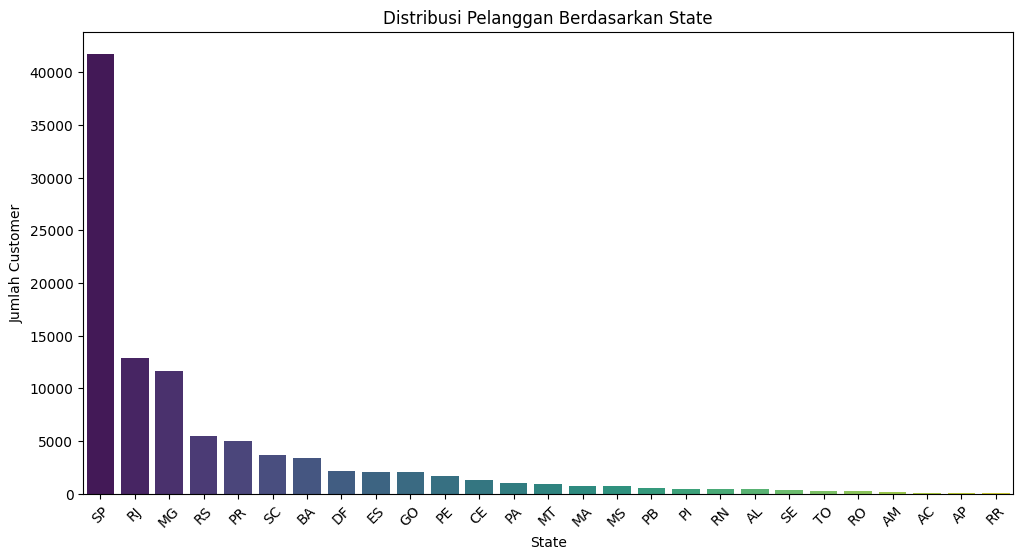

In [ ]:
# Menampilkan distribusi pelanggan berdasarkan state
plt.figure(figsize=(12,6))
ax = sns.countplot(data=customers_dataset_df, x="customer_state", order=customers_dataset_df["customer_state"].value_counts().index, palette="viridis")


plt.title("Distribusi Pelanggan Berdasarkan State")
plt.xlabel("State")
plt.ylabel("Jumlah Customer")
plt.xticks(rotation=45)
plt.show()

<ipython-input-107-3c5f92d4969c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")


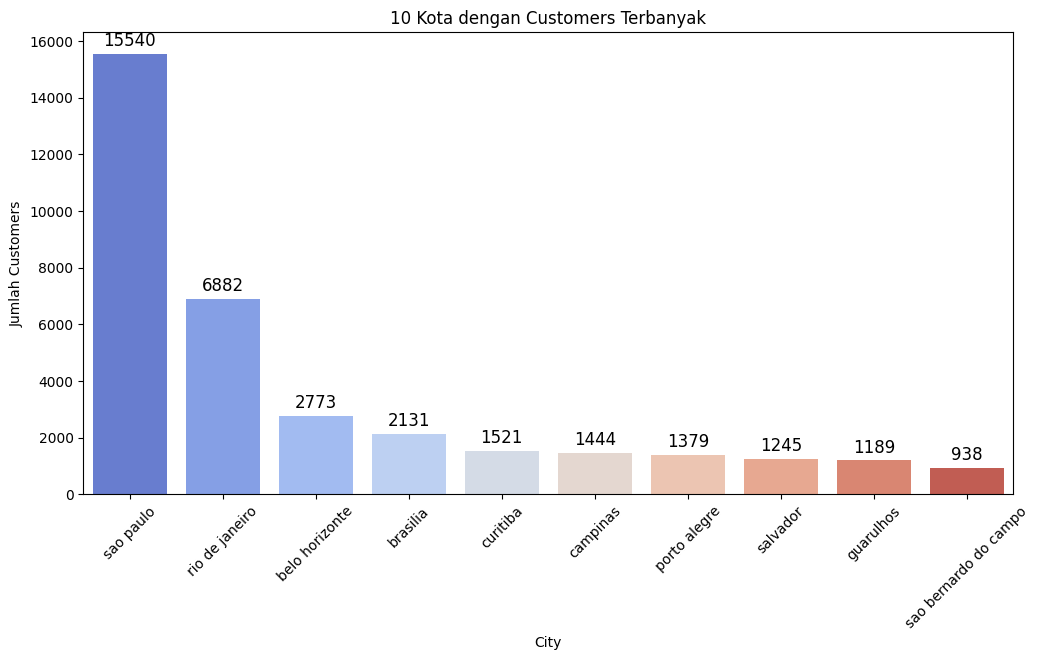

In [ ]:
# Menampilkan top 10 kota dengan pelanggan terbanyak
top_cities = customers_dataset_df["customer_city"].value_counts().head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")

#menambahkan label nilai diatas batang diagram agar bisa melihat value nya
for container in ax.containers:
  ax.bar_label(container, fontsize=12, padding=3)

plt.title("10 Kota dengan Customers Terbanyak")
plt.xlabel("City")
plt.ylabel("Jumlah Customers")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2 : Produk apa yang paling laku terjual?

<ipython-input-158-efa8dda9909e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_7_categories.values, y=top_7_categories.index, palette="Blues_r", ax=axes[0])
<ipython-input-158-efa8dda9909e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_7_categories.values, y=bottom_7_categories.index, palette="Reds_r", ax=axes[1])


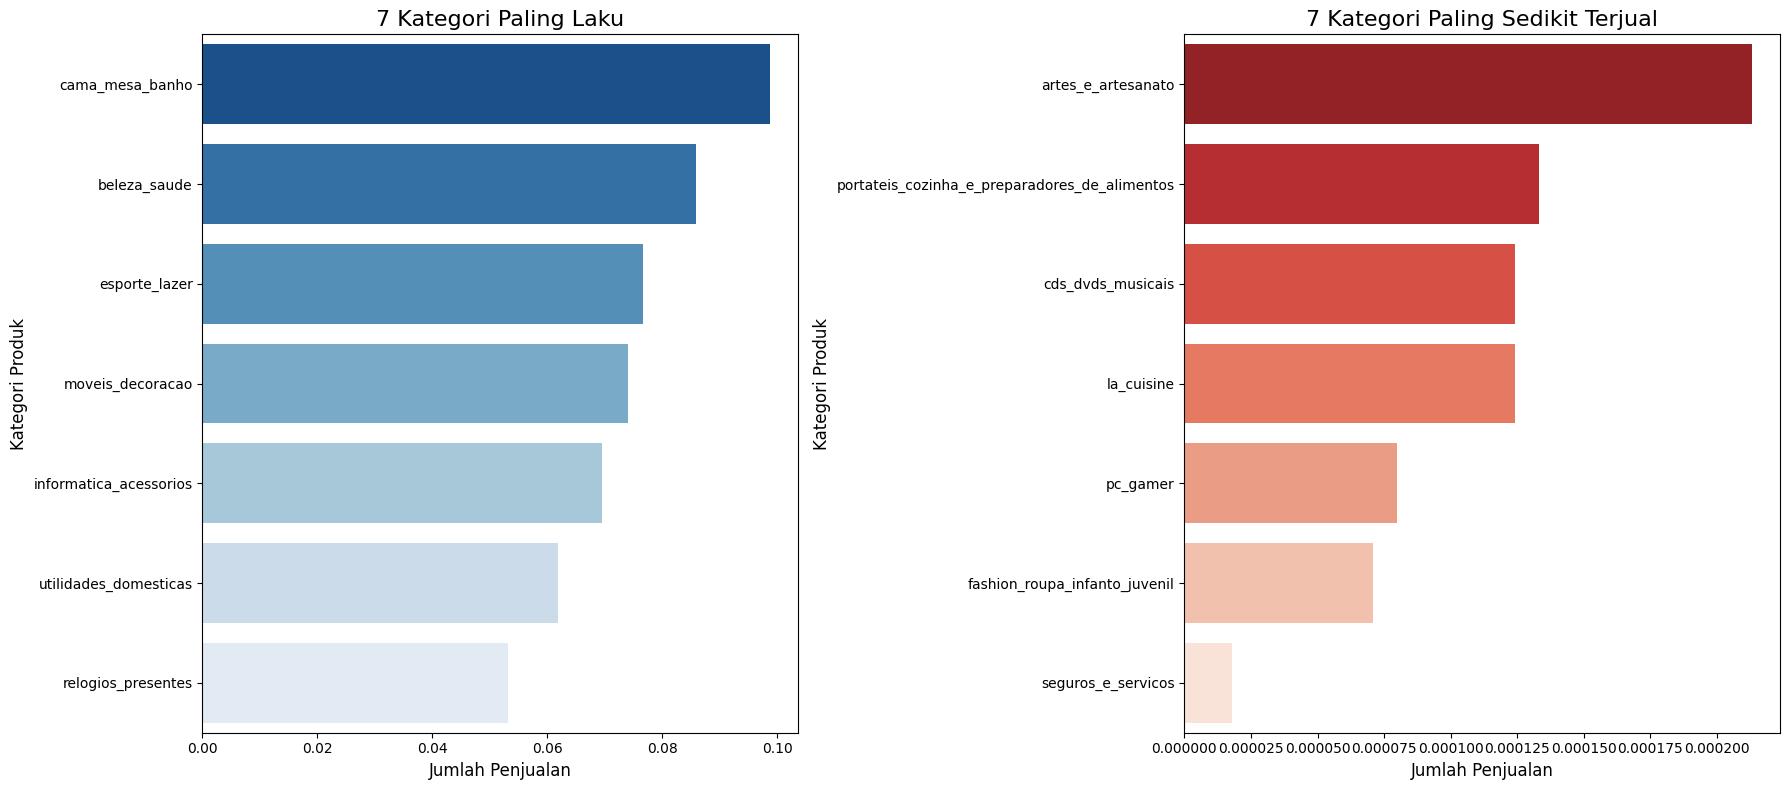

In [ ]:
#top 7 kategori paling laku dan 7 kategori paling tidak laku
top_7_categories = category_sales.head(7)
bottom_7_categories = category_sales.tail(7)

# Plot grafik batang
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Visualisasi kategori paling laku
sns.barplot(x=top_7_categories.values, y=top_7_categories.index, palette="Blues_r", ax=axes[0])
axes[0].set_title("7 Kategori Paling Laku", fontsize=16)
axes[0].set_xlabel("Jumlah Penjualan", fontsize=12)
axes[0].set_ylabel("Kategori Produk", fontsize=12)


# Visualisasi kategori paling tidak laku
sns.barplot(x=bottom_7_categories.values, y=bottom_7_categories.index, palette="Reds_r", ax=axes[1])
axes[1].set_title("7 Kategori Paling Sedikit Terjual", fontsize=16)
axes[1].set_xlabel("Jumlah Penjualan", fontsize=12)
axes[1].set_ylabel("Kategori Produk" ,fontsize=12)

plt.tight_layout()
plt.show()



**Insight:**


## Analisis Lanjutan (Opsional)

menggunakan geospatial analysis karena pada data geolocation_dataset ada latitude dan longitude berdasarkan zip code dan data customers_dataset terdapat customer_zip_code_prefix atau kode pos pelanggan.

In [84]:
import pandas as pd
import datetime as dt

In [85]:
#menggabungkan dataset orders dan customers
order_and_cust = orders_dataset_df.merge(customers_dataset_df, on="customer_id", how="left")

In [87]:
# Filter hanya order yang sudah terkirim (karena delivered adalah top status)
order_and_cust = order_and_cust[order_and_cust["order_status"] == "delivered"]

In [88]:
#konversi tanggal ke format datetime
order_and_cust["order_purchase_timestamp"] = pd.to_datetime(order_and_cust["order_purchase_timestamp"])

In [99]:
# menentukan tanggal referensi analisis (misalnya, hari terakhir transaksi) untuk menghitung recency
reference_date = order_and_cust["order_purchase_timestamp"].max()

In [98]:
# mengitung total Monetary berdasarkan order_id
monetary_df = order_payments_dataset_df.groupby('order_id')['payment_value'].sum().reset_index()


In [100]:
#menggabungkan orders dengan monetary_df berdasarkan order_id
orders_payment = orders_dataset_df.merge(order_payments_dataset_df, on='order_id', how='left')

In [105]:
#memastikan order_purchase_timestamp dalam format datetime, bukan string
orders_payment['order_purchase_timestamp'] = pd.to_datetime(orders_payment['order_purchase_timestamp'])

In [109]:
#menghitung Recency, Frequency, dan Monetary
rfm = orders_payment.groupby("customer_id").agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary

}).reset_index()

print(rfm.head())

# Ubah nama kolom
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

                        customer_id  order_purchase_timestamp  order_id  \
0  00012a2ce6f8dcda20d059ce98491703                       287         1   
1  000161a058600d5901f007fab4c27140                       409         1   
2  0001fd6190edaaf884bcaf3d49edf079                       547         1   
3  0002414f95344307404f0ace7a26f1d5                       378         1   
4  000379cdec625522490c315e70c7a9fb                       149         1   

   payment_value  
0         114.74  
1          67.41  
2         195.42  
3         179.35  
4         107.01  
                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      287          1    114.74
1  000161a058600d5901f007fab4c27140      409          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      547          1    195.42
3  0002414f95344307404f0ace7a26f1d5      378          1    179.35
4  000379cdec625522490c315e70c7a9fb      149          1    107.01


**Visualisasi data RFM analisis**

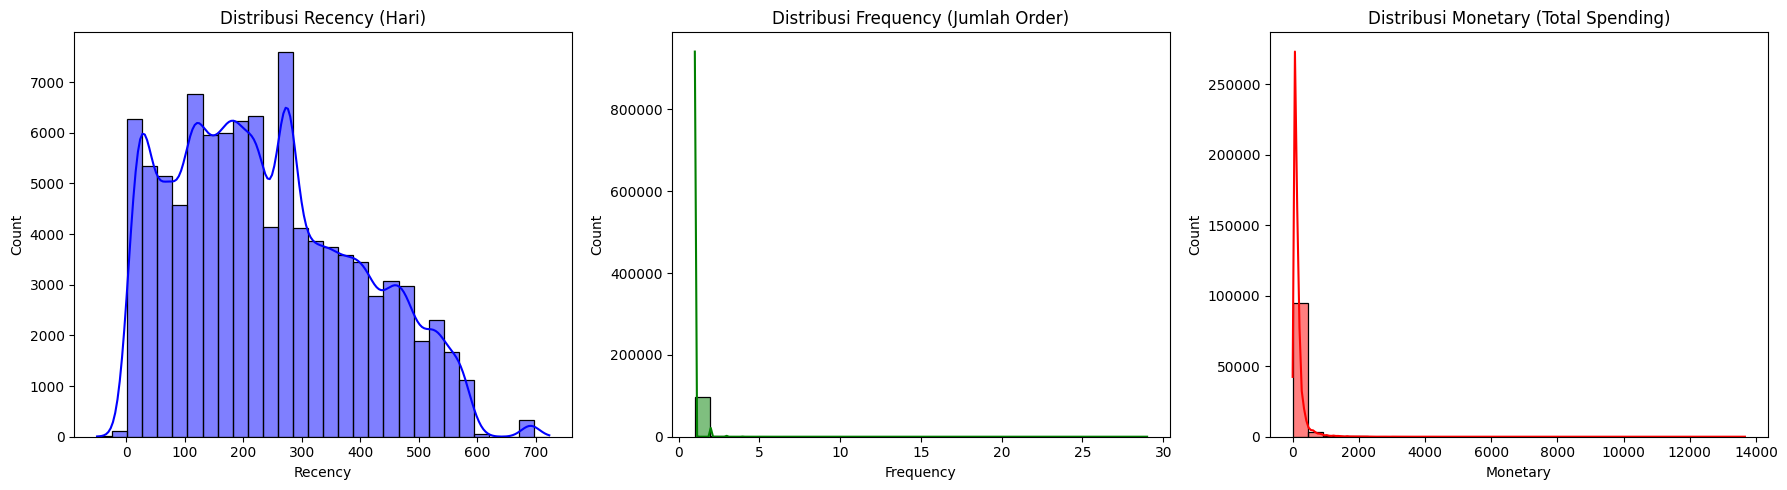

In [110]:
#Distribusi Recency, Frequency, Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title('Distribusi Recency (Hari)')

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title('Distribusi Frequency (Jumlah Order)')

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title('Distribusi Monetary (Total Spending)')

plt.tight_layout()
plt.show()


- Sebagian besar pelanggan melakukan transaksi dalam **300 hari terakhir**, tetapi ada pelanggan yang sudah lama tidak melakukan transaksi.  
- Mayoritas pelanggan hanya membeli **sekali**, dengan sangat sedikit pelanggan yang berulang kali melakukan pembelian.  
- Sebagian besar pelanggan membelanjakan dalam jumlah kecil, tetapi ada segelintir pelanggan dengan pengeluaran sangat tinggi.  
- **Strategi bisnis yang dapat diambil**:  
  1. **Retensi pelanggan lama** → Mendorong pelanggan yang lama tidak bertransaksi untuk kembali dengan promosi atau diskon.  
  2. **Meningkatkan pembelian berulang** → Program loyalitas atau insentif untuk pelanggan yang sering berbelanja.  
  3. **Segmentasi pelanggan** → Menargetkan pelanggan dengan nilai **Monetary tinggi** dengan layanan atau penawaran eksklusif.  


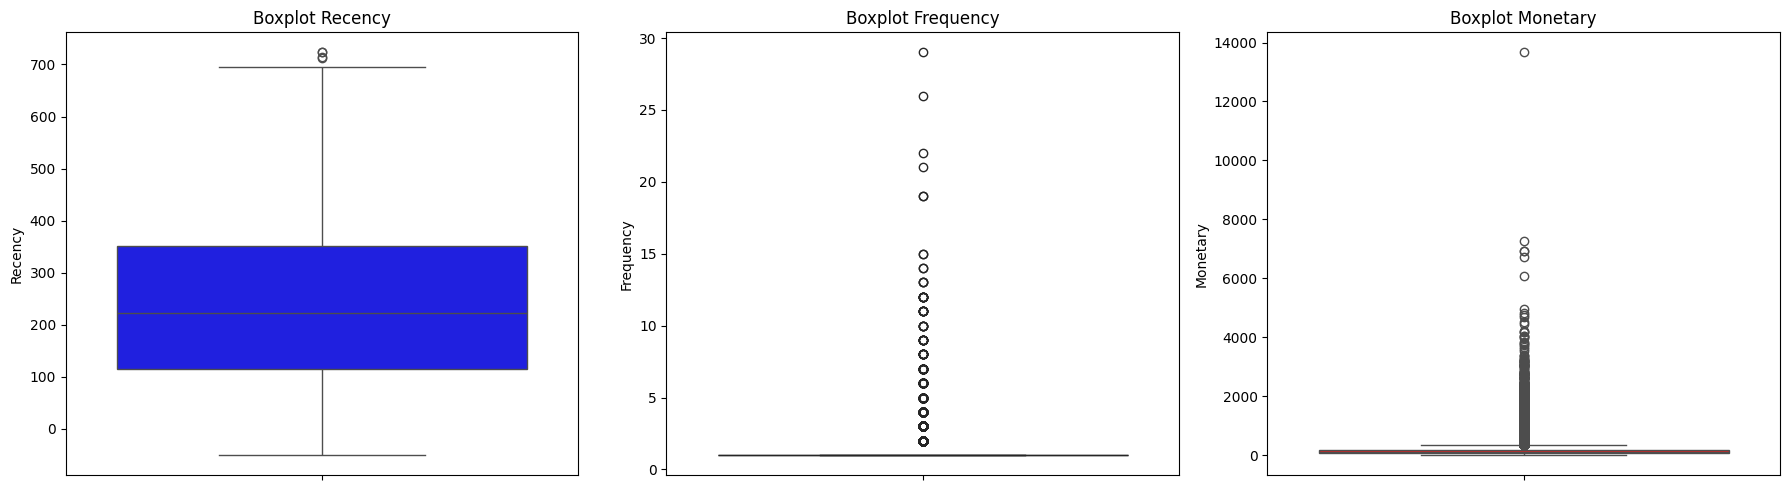

In [112]:
# Boxplot untuk melihat outlier Recency, Frequency, dan monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=rfm['Recency'], ax=axes[0], color="blue")
axes[0].set_title('Boxplot Recency')

sns.boxplot(y=rfm['Frequency'], ax=axes[1], color="green")
axes[1].set_title('Boxplot Frequency')

sns.boxplot(y=rfm['Monetary'], ax=axes[2], color="red")
axes[2].set_title('Boxplot Monetary')


plt.tight_layout()
plt.show()


- **Mayoritas pelanggan bertransaksi dalam 200 hari terakhir**, tetapi ada sebagian kecil yang sudah lama tidak melakukan transaksi (>600 hari).  
- **Sebagian besar pelanggan hanya melakukan 1 transaksi**, dengan sedikit pelanggan yang berulang kali membeli.  
- **Pengeluaran pelanggan bervariasi**, tetapi kebanyakan berbelanja dalam jumlah kecil. Ada segelintir pelanggan dengan pengeluaran yang sangat tinggi (outlier).  

---

**Rekomendasi Strategi Bisnis:**
1. **Reaktivasi pelanggan lama** → Kampanye pemasaran atau diskon untuk pelanggan yang sudah lama tidak bertransaksi.  
2. **Meningkatkan loyalitas pelanggan** → Program loyalitas atau insentif untuk mendorong pelanggan melakukan transaksi lebih dari sekali.  
3. **Menargetkan pelanggan high-spender** → Penawaran eksklusif atau premium untuk pelanggan dengan Monetary tinggi agar tetap loyal.  


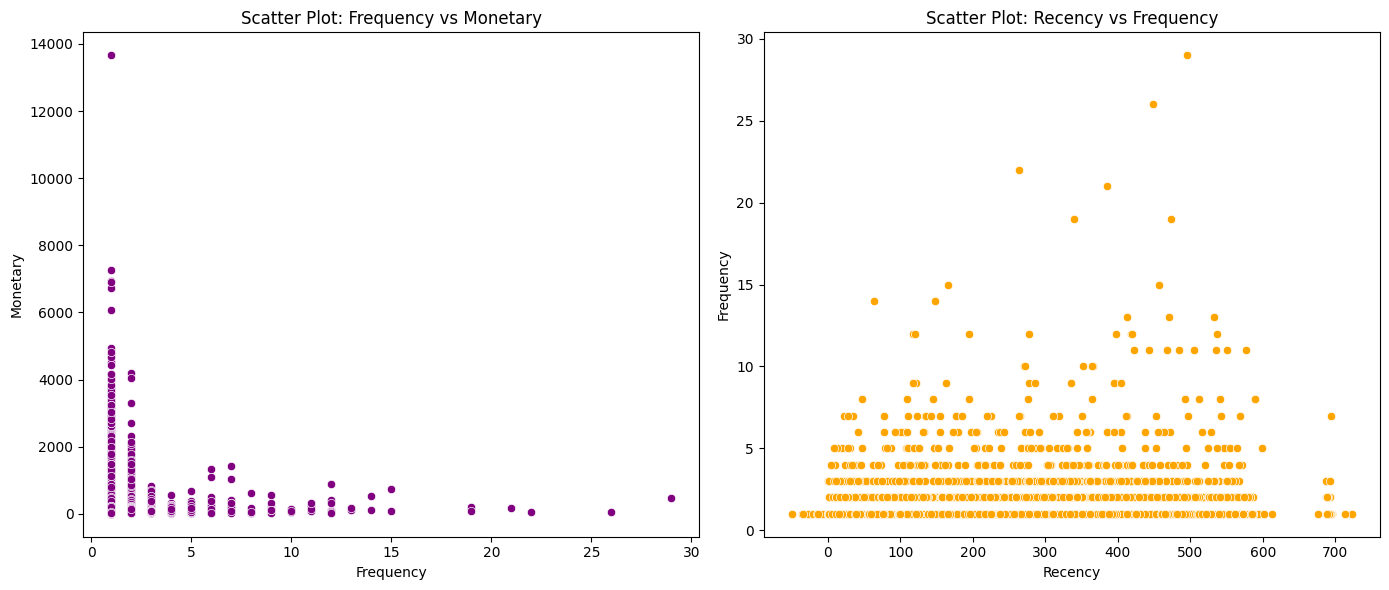

In [113]:
#Scatter Plot untuk melihat hubungan antara RFM (Frequency, Recency, Monetary)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'], ax=axes[0], color="purple")
axes[0].set_title('Scatter Plot: Frequency vs Monetary')

sns.scatterplot(x=rfm['Recency'], y=rfm['Frequency'], ax=axes[1], color="orange")
axes[1].set_title('Scatter Plot: Recency vs Frequency')

plt.tight_layout()
plt.show()

- Sebagian besar pelanggan hanya berbelanja satu kali : memerlukan strategi untuk meningkatkan transaksi berulang, misalnya dengan program loyalitas atau diskon untuk repeat customers.

- Pelanggan yang belanja dalam jumlah besar biasanya melakukan transaksi lebih dari sekali: memfokuskan penawaran eksklusif kepada pelanggan ini untuk meningkatkan loyalitas.

- Banyak pelanggan memiliki recency tinggi tetapi frequency rendah : mengadakan Kampanye re-engagement (email, promo spesial, atau notifikasi) bisa digunakan untuk menarik mereka kembali berbelanja.

## Conclusion

- Conclusion Pertanyaan 1 : **Grafik menunjukkan 10 kota dengan jumlah pelanggan terbanyak. São Paulo memiliki jumlah pelanggan tertinggi (15.540)**, jauh lebih banyak dibandingkan kota lainnya. **Rio de Janeiro berada di posisi kedua dengan 6.882 pelanggan**, hampir setengah dari São Paulo. Kota-kota lain seperti Belo Horizonte, Brasília, dan Curitiba memiliki jumlah pelanggan yang jauh lebih sedikit, dengan kurang dari 3.000 pelanggan. H**al ini menunjukkan bahwa pasar utama berada di São Paulo dan Rio de Janeiro, sehingga strategi pemasaran dapat difokuskan pada area ini untuk memaksimalkan jangkauan pelanggan.**



- Conclusion Pertanyaan 2 : Grafik menunjukkan perbandingan antara **7 kategori produk dengan penjualan tertinggi dan terendah**.  
Pada kategori **paling laku**, produk **"cama_mesa_banho"** (perlengkapan tidur & mandi) memiliki penjualan tertinggi, diikuti oleh **"beleza_saude"** (kecantikan & kesehatan) dan **"esporte_lazer"** (olahraga & rekreasi). Ini menunjukkan bahwa pelanggan lebih banyak membeli produk kebutuhan rumah tangga, kesehatan, dan gaya hidup.
Sementara itu, pada kategori **paling sedikit terjual**, produk seperti **"artes_e_arquitetura"** (seni & arsitektur) dan **"portateis_cozinha_e_preparadores_de_alimentos"** (alat masak portabel) memiliki tingkat penjualan yang sangat rendah. Ini bisa mengindikasikan bahwa produk-produk ini memiliki pasar yang lebih kecil atau kurang diminati.
**Dari analisis ini, strategi pemasaran dapat difokuskan pada kategori terlaris untuk mempertahankan penjualan, sementara kategori dengan penjualan rendah mungkin memerlukan promosi atau strategi diferensiasi untuk meningkatkan daya tariknya.**



- CONCLUSION TAMBAHAN (ANALISIS LANJUTAN RFM)  
Analisis RFM menunjukkan bahwa mayoritas pelanggan jarang bertransaksi, dengan banyak yang memiliki nilai pembelanjaan rendah. Sebagian besar pelanggan tidak aktif dalam jangka waktu lama, sehingga risiko churn cukup tinggi.  



In [116]:
# ... (your existing code) ...

# Assuming you want to save a combined DataFrame, let's create 'all_df'
# Replace the following with your desired DataFrames and merging logic:
all_df = pd.concat([customers_dataset_df, geolocation_dataset_df, order_items_dataset_df,
                 orders_dataset_df, products_dataset_df,order_payments_dataset_df], axis=1)

# Now you can save it to CSV
all_df.to_csv("analisis_ecommerce.csv", index=False)

# ... (rest of your code) ...

In [ ]:
all_df.to_csv("all_data.csv", index=False)
